<a href="https://colab.research.google.com/github/AlanEbenezer/Project-Folder/blob/main/Spotify_Danceability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Spotify_music_data = pd.read_csv('dataset.csv')

In [ ]:
Spotify_music_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
Spotify_music_data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
Spotify_music_data.dropna(inplace=True)

In [ ]:
Spotify_music_data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
Spotify_music_data.duplicated().sum()

0

In [ ]:
pop_data = Spotify_music_data[['popularity','duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
p_train, predictors_test, t_train, target_test = train_test_split(
  pop_data.drop(['danceability'], axis=1), pop_data["danceability"],
   test_size=0.25,
  random_state=123
)

In [ ]:
p_train


,popularity,duration_ms,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106954,36,187159,0.2690,0,-17.422,1,0.1020,0.659000,0.006490,0.1200,0.4800,127.011,4
464,54,145514,0.2800,9,-12.788,1,0.0303,0.755000,0.000000,0.3260,0.5270,106.966,4
14389,36,131226,0.3870,7,-6.799,1,0.1470,0.908000,0.000000,0.1850,0.8390,159.966,4
62289,0,194706,0.4470,8,-7.932,1,0.0404,0.224000,0.000000,0.0704,0.3650,123.855,4
64081,0,200461,0.5430,8,-6.296,1,0.0367,0.463000,0.000523,0.0928,0.3540,143.912,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,49,90000,0.9650,11,-3.007,1,0.1290,0.257000,0.000000,0.4000,0.7550,97.006,4
61404,22,218946,0.8290,2,-2.629,1,0.0311,0.020400,0.000020,0.0178,0.8960,103.047,4
17730,18,200125,0.0265,1,-15.997,0,0.0425,0.849000,0.285000,0.1680,0.0771,120.835,1
28030,58,241411,0.6340,9,-7.689,1,0.0538,0.000904,0.000000,0.1310,0.1050,170.213,4


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XG': XGBRegressor(),
    'LGBM': LGBMRegressor()

}

In [ ]:
mae_results = {}
r2_results = {}
results = {}

In [ ]:
for name, model in models.items():
    cv_scores = cross_val_score(model, p_train, t_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)


    model.fit(p_train, t_train)
    predictions = model.predict(p_train)


    mae = mean_absolute_error(t_train, predictions)
    r2 = r2_score(t_train, predictions)
    results[name] = rmse_scores
    mae_results[name] = mae
    r2_results[name] = r2

    print(f"{name} - RMSE: {rmse_scores.mean()} -Standart Deviation: {rmse_scores.std()}")
    print(f"{name} - MAE: {mae:.2f} - R²: {r2:.2f}")

Linear Regression - RMSE: 0.13956680879179292 -Standart Deviation: 0.0004037495242650268
Linear Regression - MAE: 0.11 - R²: 0.35
Ridge - RMSE: 0.1395668090667521 -Standart Deviation: 0.00040345211703250256
Ridge - MAE: 0.11 - R²: 0.35
Lasso - RMSE: 0.1727659313602233 -Standart Deviation: 0.0005703358163743642
Lasso - MAE: 0.14 - R²: 0.01
XG - RMSE: 0.09998363754171177 -Standart Deviation: 0.00031885558776159086
XG - MAE: 0.07 - R²: 0.74
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2413
[LightGBM] [Info] Number of data points in the train set: 68399, number of used features: 13
[LightGBM] [Info] Start training from score 0.567104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

In [ ]:
colors = sns.color_palette('rocket', n_colors=len(model_names))
colors2 = sns.color_palette('PuBu', n_colors=len(model_names))
colors3 = sns.color_palette('pastel', n_colors=len(model_names))

Text(0.5, 1.0, 'R² Scores for Different Models')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

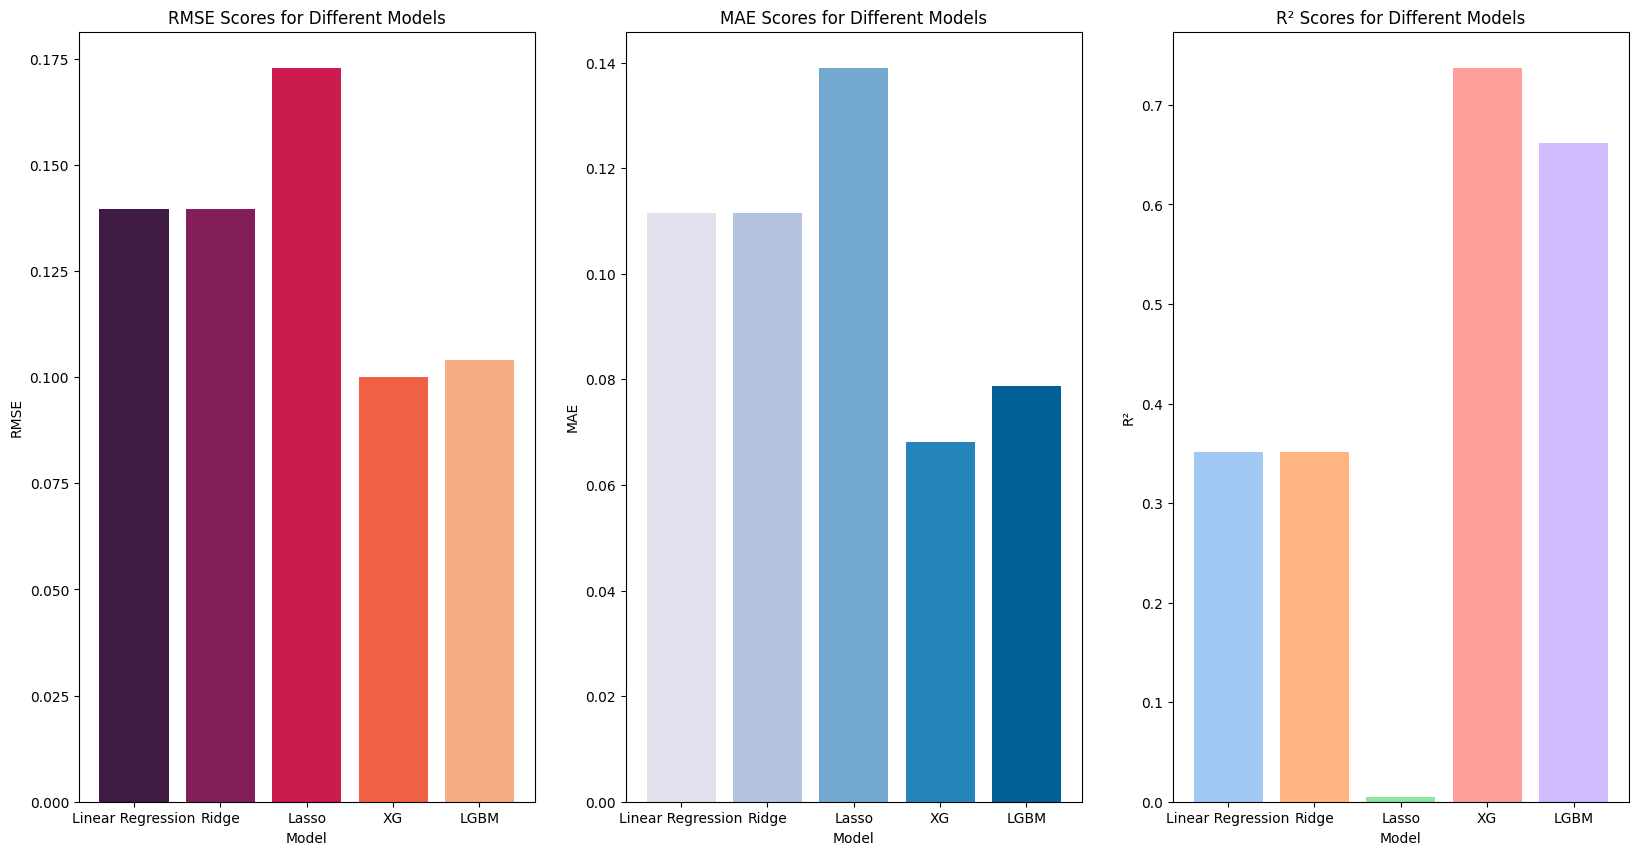

In [ ]:
#compare models with graph
fig, axes = plt.subplots(1,3, figsize=(20,10))
model_names = list(results.keys())
rmse_scores = [np.mean(scores) for scores in results.values()]
mae_scores = [np.mean(scores) for scores in mae_results.values()]
r2_scores = [np.mean(scores) for scores in r2_results.values()]

plt.figure(figsize=(10, 6))
axes[0].bar(model_names, rmse_scores, color = colors)
plt.sca(axes[0])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Scores for Different Models')



plt.figure(figsize=(10, 6))
axes[1].bar(model_names, mae_scores, color=colors2)
plt.sca(axes[1])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Scores for Different Models')


axes[2].bar(model_names, r2_scores, color =colors3)
plt.sca(axes[2])
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('R² Scores for Different Models')

